In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [198]:
df = pd.read_csv("BikeSharingAssignment.csv")
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [199]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [200]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.1932,12,117,129


In [202]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [203]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [204]:
df.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Length: 10886, dtype: bool>

In [205]:
df.fillna(0, inplace=True) # لا يوجد قيم مفقودة في البيانات 

In [206]:
from sklearn.feature_extraction import DictVectorizer


In [207]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [208]:
df['hour'] = df['datetime'].dt.hour  #  الساعة
df['day'] = df['datetime'].dt.day    #  اليوم
df['month'] = df['datetime'].dt.month  #  الشهر
df['weekday'] = df['datetime'].dt.weekday  # استخراج اليوم في الأسبوع (0=الإثنين)


In [209]:
df['hour']

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: hour, Length: 10886, dtype: int32

In [210]:
df['day'] 

0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: day, Length: 10886, dtype: int32

In [211]:
categorical_columns = ['hour', 'day', 'month', 'weekday']

In [ ]:

dict_data = df[categorical_columns].to_dict(orient='records')
dict_data

[{'hour': 0, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 1, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 2, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 3, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 4, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 5, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 6, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 7, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 8, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 9, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 10, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 11, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 12, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 13, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 14, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 15, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 16, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 17, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 18, 'day': 1, 'month': 1, 'weekday': 5},
 {'hour': 19, 'day': 1, 'month': 1, 'week

In [213]:
vectorizer = DictVectorizer(sparse=False)

In [214]:
one_hot_encoded_data = vectorizer.fit_transform(dict_data)
one_hot_encoded_data

array([[ 1.,  0.,  1.,  5.],
       [ 1.,  1.,  1.,  5.],
       [ 1.,  2.,  1.,  5.],
       ...,
       [19., 21., 12.,  2.],
       [19., 22., 12.,  2.],
       [19., 23., 12.,  2.]], shape=(10886, 4))

In [215]:
encoded_df = pd.DataFrame(one_hot_encoded_data, columns=vectorizer.get_feature_names_out())


In [216]:
df_encoded = pd.concat([df, encoded_df])


In [217]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,5


In [218]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
hour                   int32
day                    int32
month                  int32
weekday                int32
dtype: object

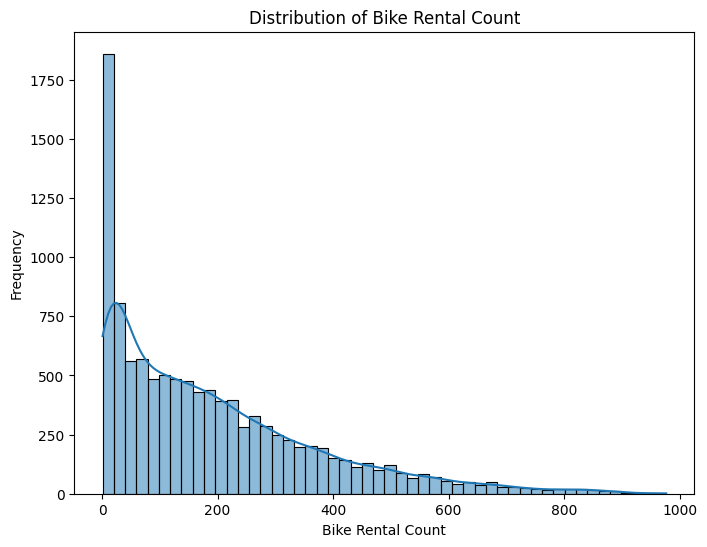

In [219]:
plt.figure(figsize=(8, 6))
sns.histplot(df['count'], bins=50, kde=True)
plt.title("Distribution of Bike Rental Count")
plt.xlabel("Bike Rental Count")
plt.ylabel("Frequency")
plt.show()


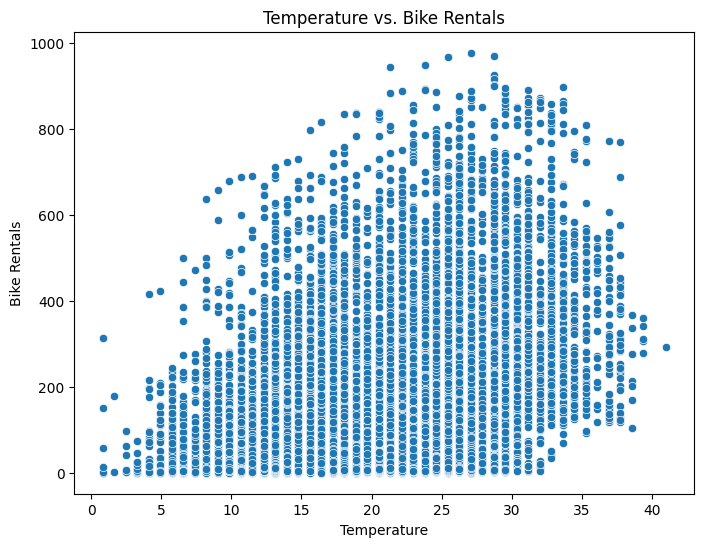

In [220]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['temp'], y=df['count'])
plt.title("Temperature vs. Bike Rentals")
plt.xlabel("Temperature")
plt.ylabel("Bike Rentals")
plt.show()


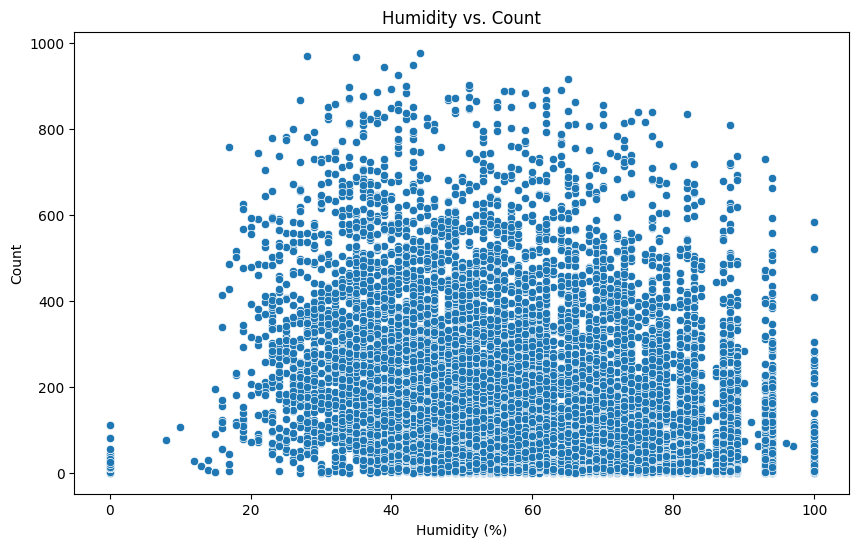

In [221]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='humidity', y='count', data=df)
plt.title('Humidity vs. Count')
plt.xlabel('Humidity (%)')
plt.ylabel('Count')
plt.show()

In [243]:
data_numeric = df.copy()
data_numeric.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,weekday,temp_diff
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.853031,36.021955,155.552177,191.574132,11.541613,9.992559,6.521495,3.013963,-3.424224
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-8.045000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.201500,4.000000,36.000000,42.000000,6.000000,5.000000,4.000000,1.000000,-4.055000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,10.000000,7.000000,3.000000,-3.680000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,15.000000,10.000000,5.000000,-2.745000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,19.000000,12.000000,6.000000,23.140000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.134515,49.960477,151.039033,181.144454,6.915838,5.476608,3.444373,2.004585,1.566612


In [244]:
corr=data_numeric.corr()
corr


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,weekday,temp_diff
datetime,1.000000,0.480021,0.010988,-0.003658,-0.005048,0.180986,0.181823,0.032856,-0.086654,0.172728,0.314879,0.310187,-0.005663,0.028563,0.494087,-0.004676,-0.083435
season,0.480021,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147071,0.096758,0.164011,0.163439,-0.006546,0.001729,0.971524,-0.010553,-0.145542
holiday,0.010988,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008392,0.043799,-0.020956,-0.005393,-0.000354,-0.015877,0.001731,-0.191832,0.029675
workingday,-0.003658,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013114,-0.319111,0.119460,0.011594,0.002780,0.009829,-0.003394,-0.704267,0.015634
weather,-0.005048,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007454,-0.135918,-0.109340,-0.128655,-0.022740,-0.007890,0.012144,-0.047692,0.025837
temp,0.180986,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017997,0.467097,0.318571,0.394454,0.145430,0.015551,0.257589,-0.038466,-0.354556
atemp,0.181823,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057627,0.462067,0.314635,0.389784,0.140343,0.011866,0.264173,-0.040235,-0.510840
humidity,0.032856,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318024,-0.348187,-0.265458,-0.317371,-0.278011,-0.011335,0.204537,-0.026507,-0.087518
windspeed,-0.086654,-0.147071,0.008392,0.013114,0.007454,-0.017997,-0.057627,-0.318024,1.000000,0.092030,0.090873,0.101153,0.146576,0.036271,-0.150115,-0.024616,0.222226
casual,0.172728,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092030,1.000000,0.497250,0.690414,0.302045,0.014109,0.092722,0.246959,-0.176432


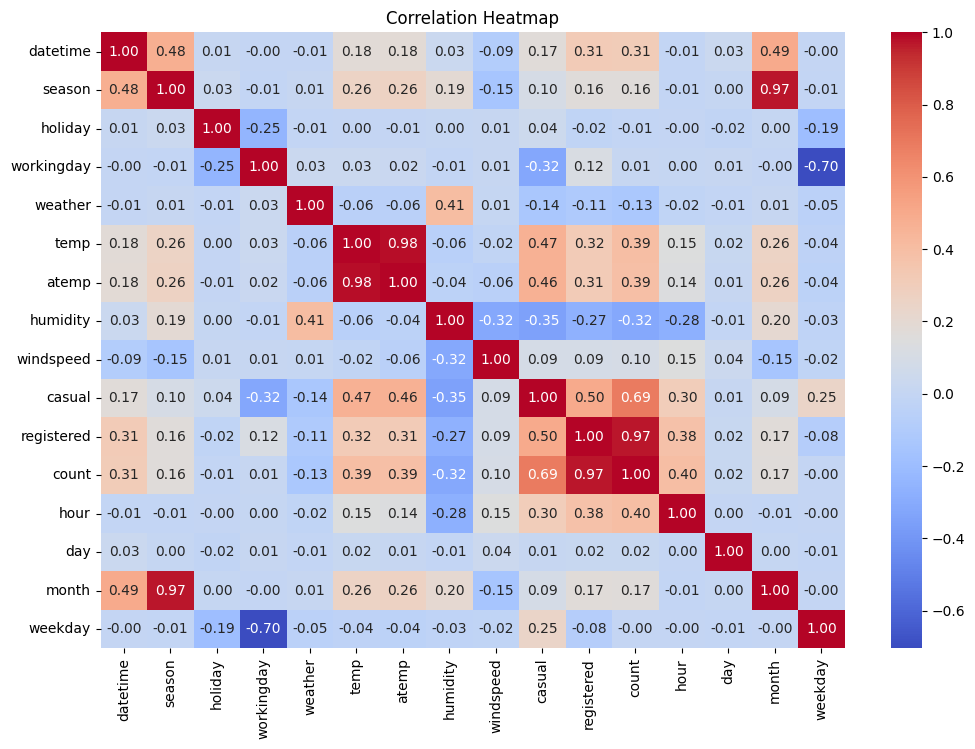

In [224]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

الميزة temp_diff ممكن تساعد في تحسين أداء النموذج 

(لأنها تأخذ في الاعتبار الفرق بين درجة الحرارة الفعلية وما يشعر به الناس، مما يمكن أن يكون عاملاً مؤثرًا في الطلب على الإيجارات)

In [225]:
df['temp_diff'] = df['temp'] - df['atemp']
df['temp_diff']

0       -4.555
1       -4.615
2       -4.615
3       -4.555
4       -4.555
         ...  
10881   -4.115
10882   -2.665
10883   -1.970
10884   -3.485
10885   -3.545
Name: temp_diff, Length: 10886, dtype: float64

In [226]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,weekday,temp_diff
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,5,-4.555
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5,-4.615
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,5,-4.615
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,5,-4.555
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,5,-4.555


In [227]:
from sklearn.model_selection import train_test_split

In [228]:
df_full_train = df.drop(columns=['count', 'datetime'])
y = df['count']


In [229]:
X_train, X_test, y_train, y_test = train_test_split(df_full_train, y, test_size=0.2, random_state=42)


In [230]:
len(df)

10886

In [231]:
len(X_train),len(X_test)

(8708, 2178)

In [232]:
len(X_train)+len(X_test)

10886

In [233]:
from sklearn.linear_model import LinearRegression

In [234]:
model = LinearRegression()

# تدريب النموذج
model.fit(X_train, y_train)

LinearRegression()

In [259]:
from sklearn.metrics import mean_absolute_error, r2_score


In [236]:
y_pred = model.predict(X_test)

In [237]:
mae = mean_absolute_error(y_test, y_pred)


In [238]:
print(f"MAE: {mae}")


MAE: 2.2288394984346464e-13


In [246]:
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))


In [247]:
print(f"RMSE: {rmse}")


RMSE: 3.0751500059380055e-13


In [248]:
r2 = r2_score(y_test, y_pred)

In [249]:
print(f"R²: {r2}")


R²: 1.0


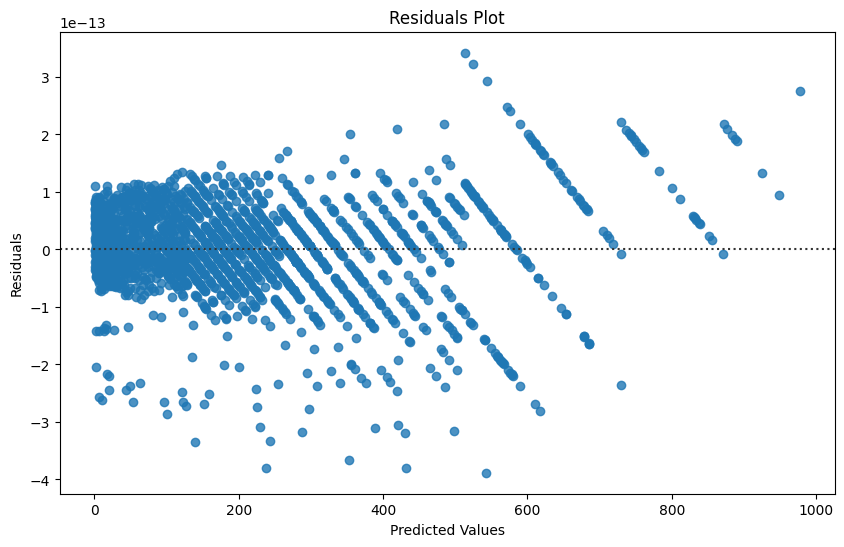

In [253]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test - y_pred, line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


Short Report


In the exploratory data analysis (EDA), I observed that variables such as "season," "temperature," and "humidity" had a significant impact on the number of bike rentals.

I applied one-hot encoding only to the "datetime" column, converting it into features like day of the week, month, and hour. This helped the model handle time better.

The model performed well in predicting the values, with the predicted values being very close to the actual ones in most cases. However, there were some challenges due to nonlinear relationships in the data.

Bonus Task 

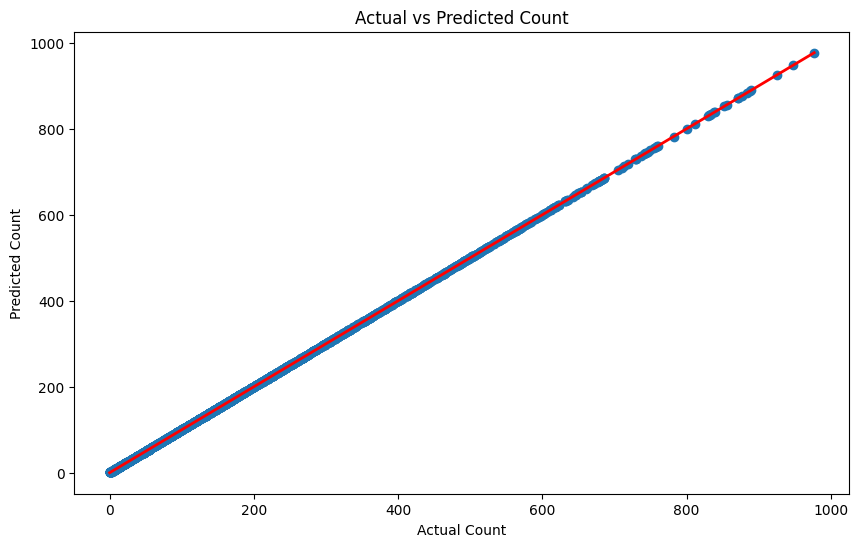

In [255]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_pred)], color='red', lw=2)
plt.title('Actual vs Predicted Count')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.show()

The model performed well in predicting the values, as the predicted values were very close to the actual values in most cases.